In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from smyleutils import averaging_utils as avg
from smyleutils import qboplot_utils as qbo
from smyleutils import colorbar_utils as cbars
from smyleutils import bootstrap_utils as boot
from smyleutils import zmplot_utils as zmplot

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/NCAR_CW3E_SMYLE/FIGURES/"

### Read in the data

In [3]:
basepath="/project/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Uzm/"

high_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init11.nc')
low_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init11.nc') ; low_nov['lat'] = high_nov.lat
era5_nov=xr.open_dataset(basepath+'Uzm_ERA5_day_init11.nc') ; era5_nov['lat'] = high_nov.lat

high_feb=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init02.nc') ; high_feb['lat'] = high_nov.lat
low_feb=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init02.nc') ; low_feb['lat'] = high_nov.lat
era5_feb=xr.open_dataset(basepath+'Uzm_ERA5_day_init02.nc') ; era5_feb['lat'] = high_nov.lat

high_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init09.nc') ; high_sep['lat'] = high_nov.lat
low_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init09.nc') ; low_sep['lat'] = high_nov.lat
era5_sep=xr.open_dataset(basepath+'Uzm_ERA5_day_init09.nc') ; era5_sep['lat'] = high_nov.lat

### Select the first 6 months since that's what we have for the high top

In [4]:
startdate=high_nov.time.isel(time=0).values ; enddate=high_nov.time.isel(time=high_nov.time.size-1).values
high_nov = high_nov.sel(time=slice(startdate,enddate)).Uzm
low_nov = low_nov.sel(time=slice(startdate,enddate)).Uzm
era5_nov = era5_nov.sel(time=slice(startdate,enddate)).Uzm

startdate=high_sep.time.isel(time=0).values ; enddate=high_sep.time.isel(time=high_sep.time.size-1).values
high_sep = high_sep.sel(time=slice(startdate,enddate)).Uzm
low_sep = low_sep.sel(time=slice(startdate,enddate)).Uzm
era5_sep = era5_sep.sel(time=slice(startdate,enddate)).Uzm

startdate=high_feb.time.isel(time=0).values ; enddate=high_feb.time.isel(time=high_feb.time.size-1).values
high_feb = high_feb.sel(time=slice(startdate,enddate)).Uzm
low_feb = low_feb.sel(time=slice(startdate,enddate)).Uzm
era5_feb = era5_feb.sel(time=slice(startdate,enddate)).Uzm

### Interpolate the model data from the pressure levels of the CAM TEM diagnostics onto the ERA5 pressure levels

In [5]:
high_nov = high_nov.interp(ilev=era5_nov.level) ; low_nov = low_nov.interp(ilev=era5_nov.level)
high_sep = high_sep.interp(ilev=era5_sep.level) ; low_sep = low_sep.interp(ilev=era5_sep.level)
high_feb = high_feb.interp(ilev=era5_feb.level) ; low_feb = low_feb.interp(ilev=era5_feb.level)

### Calculate lead month 2-4 averages

In [6]:
high_nov_djf = high_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')
low_nov_djf = low_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')
era5_nov_djf = era5_nov.sel(time=slice("1970-12-01","1971-02-28")).mean('time')

high_sep_ond = high_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')
low_sep_ond = low_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')
era5_sep_ond = era5_sep.sel(time=slice("1970-10-01","1970-12-31")).mean('time')

high_feb_mam = high_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')
low_feb_mam = low_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')
era5_feb_mam = era5_feb.sel(time=slice("1970-03-01","1970-05-31")).mean('time')

### Calculate the ensemble mean

In [7]:
high_nov_djf_em = high_nov_djf.mean('M') ; low_nov_djf_em = low_nov_djf.mean('M') 
high_sep_ond_em = high_sep_ond.mean('M') ; low_sep_ond_em = low_sep_ond.mean('M') 
high_feb_mam_em = high_feb_mam.mean('M') ; low_feb_mam_em = low_feb_mam.mean('M')

### Calculate the lead dependent climatology

In [8]:
era5_nov_djf_clim = era5_nov_djf.mean('init_year') ; high_nov_djf_clim = high_nov_djf_em.mean('init_year') ; low_nov_djf_clim = low_nov_djf_em.mean('init_year')
era5_sep_ond_clim = era5_sep_ond.mean('init_year') ; high_sep_ond_clim = high_sep_ond_em.mean('init_year') ; low_sep_ond_clim = low_sep_ond_em.mean('init_year')
era5_feb_mam_clim = era5_feb_mam.mean('init_year') ; high_feb_mam_clim = high_feb_mam_em.mean('init_year') ; low_feb_mam_clim = low_feb_mam_em.mean('init_year')

### Subtract the lead dependent climatology from ERA5 and the SMYLE ensemble mean and the SMYLE individual member

In [9]:
high_nov_djf = high_nov_djf - high_nov_djf_clim ; high_nov_djf_em = high_nov_djf_em - high_nov_djf_clim
high_sep_ond = high_sep_ond - high_sep_ond_clim ; high_sep_ond_em = high_sep_ond_em - high_sep_ond_clim
high_feb_mam = high_feb_mam - high_feb_mam_clim ; high_feb_mam_em = high_feb_mam_em - high_feb_mam_clim

low_nov_djf = low_nov_djf - low_nov_djf_clim ; low_nov_djf_em = low_nov_djf_em - low_nov_djf_clim
low_sep_ond = low_sep_ond - low_sep_ond_clim ; low_sep_ond_em = low_sep_ond_em - low_sep_ond_clim
low_feb_mam = low_feb_mam - low_feb_mam_clim ; low_feb_mam_em = low_feb_mam_em - low_feb_mam_clim

era5_nov_djf = era5_nov_djf - era5_nov_djf_clim
era5_sep_ond = era5_sep_ond - era5_sep_ond_clim
era5_feb_mam = era5_feb_mam - era5_feb_mam_clim

### Anomaly correlation coefficient

In [10]:
acc_high_nov = xr.corr(era5_nov_djf, high_nov_djf_em, dim='init_year')
acc_low_nov = xr.corr(era5_nov_djf, low_nov_djf_em, dim='init_year')

acc_high_sep = xr.corr(era5_sep_ond, high_sep_ond_em, dim='init_year')
acc_low_sep = xr.corr(era5_sep_ond, low_sep_ond_em, dim='init_year')

acc_high_feb = xr.corr(era5_feb_mam, high_feb_mam_em, dim='init_year')
acc_low_feb = xr.corr(era5_feb_mam, low_feb_mam_em, dim='init_year')

### Mean squared skill score 

In [11]:
def calcmsss(mod,obs,dim='init_year'):
    mse_mod = (1./mod[dim].size)*((mod - obs)**2).sum('init_year')
    mse_obs = (1./mod[dim].size)*(obs**2).sum('init_year')
    msss = 1 - (mse_mod / mse_obs)
    
    # dealing with the levels where low top doesn't have any data
    msss = msss.where( msss != 1, nan)
    return msss

In [12]:
msss_high_nov = calcmsss(high_nov_djf_em, era5_nov_djf)
msss_low_nov = calcmsss(low_nov_djf_em, era5_nov_djf)

msss_high_sep = calcmsss(high_sep_ond_em, era5_sep_ond)
msss_low_sep = calcmsss(low_sep_ond_em, era5_sep_ond)

msss_high_feb = calcmsss(high_feb_mam_em, era5_feb_mam)
msss_low_feb = calcmsss(low_feb_mam_em, era5_feb_mam)

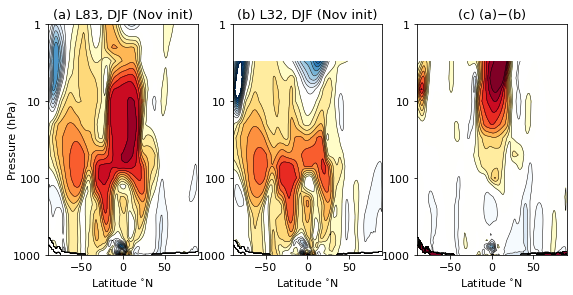

In [13]:
fig = plt.figure(figsize=(16,16))

ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov, msss_high_nov.lat, msss_high_nov.level,0.1,-1,1,'(a) L83, DJF (Nov init)',
                              0.03,0.16,0.8,1)

ax = zmplot.plotlatlogpre_to1(fig, msss_low_nov, msss_low_nov.lat, msss_low_nov.level,0.1,-1,1,'(b) L32, DJF (Nov init)',
                              0.19,0.32,0.8,1, ylabel=False)

ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov - msss_low_nov, msss_low_nov.lat, msss_low_nov.level,0.1,-1,1,'(c) (a)$-$(b)',
                              0.35,0.48,0.8,1,ylabel=False)

#ax = zmplot.plotlatlogpre_to1(fig, acc_low_feb, acc_low_feb.lat, acc_low_feb.level,0.1,-1,1,' ',
#                              0.27,0.47,0.7,1)

### Analysis of individual months

### Lead dependent climatology

In [14]:
high_nov_clim = high_nov.mean('init_year') ; low_nov_clim = low_nov.mean('init_year') ; era5_nov_clim = era5_nov.mean('init_year')
high_feb_clim = high_feb.mean('init_year') ; low_feb_clim = low_feb.mean('init_year') ; era5_feb_clim = era5_feb.mean('init_year')
high_sep_clim = high_sep.mean('init_year') ; low_sep_clim = low_sep.mean('init_year') ; era5_sep_clim = era5_sep.mean('init_year')

#### Anomalies from lead dependent climatology

In [15]:
high_nov_anoms = high_nov - high_nov_clim ; low_nov_anoms = low_nov - low_nov_clim ; era5_nov_anoms = era5_nov - era5_nov_clim
high_feb_anoms = high_feb - high_feb_clim ; low_feb_anoms = low_feb - low_feb_clim ; era5_feb_anoms = era5_feb - era5_feb_clim
high_sep_anoms = high_sep - high_sep_clim ; low_sep_anoms = low_sep - low_sep_clim ; era5_sep_anoms = era5_sep - era5_sep_clim

In [16]:
months = [11, 12, 1, 2, 3, 4]
high_nov_anoms_mon = [ high_nov_anoms.where( high_nov_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
high_nov_anoms_mon = xr.concat(high_nov_anoms_mon, dim=months)
high_nov_anoms_mon = high_nov_anoms_mon.rename(concat_dim='month')
low_nov_anoms_mon = [ low_nov_anoms.where( low_nov_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ] 
low_nov_anoms_mon = xr.concat(low_nov_anoms_mon, dim=months)
low_nov_anoms_mon = low_nov_anoms_mon.rename(concat_dim='month')
era5_nov_anoms_mon = [ era5_nov_anoms.where( era5_nov_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
era5_nov_anoms_mon = xr.concat(era5_nov_anoms_mon, dim=months)
era5_nov_anoms_mon = era5_nov_anoms_mon.rename(concat_dim='month')

months=[2,3,4,5,6,7]
high_feb_anoms_mon = [ high_feb_anoms.where( high_feb_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
high_feb_anoms_mon = xr.concat(high_feb_anoms_mon, dim=months)
high_feb_anoms_mon = high_feb_anoms_mon.rename(concat_dim='month')
low_feb_anoms_mon = [ low_feb_anoms.where( low_feb_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ] 
low_feb_anoms_mon = xr.concat(low_feb_anoms_mon, dim=months)
low_feb_anoms_mon = low_feb_anoms_mon.rename(concat_dim='month')
era5_feb_anoms_mon = [ era5_feb_anoms.where( era5_feb_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
era5_feb_anoms_mon = xr.concat(era5_feb_anoms_mon, dim=months)
era5_feb_anoms_mon = era5_feb_anoms_mon.rename(concat_dim='month')

months=[9,10,11,12,1,2]
high_sep_anoms_mon = [ high_sep_anoms.where( high_sep_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
high_sep_anoms_mon = xr.concat(high_sep_anoms_mon, dim=months)
high_sep_anoms_mon = high_sep_anoms_mon.rename(concat_dim='month')
low_sep_anoms_mon = [ low_sep_anoms.where( low_sep_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ] 
low_sep_anoms_mon = xr.concat(low_sep_anoms_mon, dim=months)
low_sep_anoms_mon = low_sep_anoms_mon.rename(concat_dim='month')
era5_sep_anoms_mon = [ era5_sep_anoms.where( era5_sep_anoms.time.dt.month == imon, drop=True).mean('time') for imon in months ]
era5_sep_anoms_mon = xr.concat(era5_sep_anoms_mon, dim=months)
era5_sep_anoms_mon = era5_sep_anoms_mon.rename(concat_dim='month')

In [17]:
high_nov_anoms_mon_10 = high_nov_anoms_mon.sel(level=10.) 
low_nov_anoms_mon_10 = low_nov_anoms_mon.sel(level=10.)
era5_nov_anoms_mon_10 = era5_nov_anoms_mon.sel(level=10.)

high_nov_anoms_mon_10_nh = avg.cosweightlat(high_nov_anoms_mon_10, 60, 70)
low_nov_anoms_mon_10_nh = avg.cosweightlat(low_nov_anoms_mon_10, 60, 70)
era5_nov_anoms_mon_10_nh = avg.cosweightlat(era5_nov_anoms_mon_10, 60, 70)

high_nov_anoms_mon_10_sh = avg.cosweightlat(high_nov_anoms_mon_10, -70, -60)
low_nov_anoms_mon_10_sh = avg.cosweightlat(low_nov_anoms_mon_10, -70, -60)
era5_nov_anoms_mon_10_sh = avg.cosweightlat(era5_nov_anoms_mon_10, -70, -60)


high_feb_anoms_mon_10 = high_feb_anoms_mon.sel(level=10.) 
low_feb_anoms_mon_10 = low_feb_anoms_mon.sel(level=10.)
era5_feb_anoms_mon_10 = era5_feb_anoms_mon.sel(level=10.)

high_feb_anoms_mon_10_nh = avg.cosweightlat(high_feb_anoms_mon_10, 60, 70)
low_feb_anoms_mon_10_nh = avg.cosweightlat(low_feb_anoms_mon_10, 60, 70)
era5_feb_anoms_mon_10_nh = avg.cosweightlat(era5_feb_anoms_mon_10, 60, 70)

high_feb_anoms_mon_10_sh = avg.cosweightlat(high_feb_anoms_mon_10, -70, -60)
low_feb_anoms_mon_10_sh = avg.cosweightlat(low_feb_anoms_mon_10, -70, -60)
era5_feb_anoms_mon_10_sh = avg.cosweightlat(era5_feb_anoms_mon_10, -70, -60)


high_sep_anoms_mon_10 = high_sep_anoms_mon.sel(level=10.) 
low_sep_anoms_mon_10 = low_sep_anoms_mon.sel(level=10.)
era5_sep_anoms_mon_10 = era5_sep_anoms_mon.sel(level=10.)

high_sep_anoms_mon_10_nh = avg.cosweightlat(high_sep_anoms_mon_10, 60, 70)
low_sep_anoms_mon_10_nh = avg.cosweightlat(low_sep_anoms_mon_10, 60, 70)
era5_sep_anoms_mon_10_nh = avg.cosweightlat(era5_sep_anoms_mon_10, 60, 70)

high_sep_anoms_mon_10_sh = avg.cosweightlat(high_sep_anoms_mon_10, -70, -60)
low_sep_anoms_mon_10_sh = avg.cosweightlat(low_sep_anoms_mon_10, -70, -60)
era5_sep_anoms_mon_10_sh = avg.cosweightlat(era5_sep_anoms_mon_10, -70, -60)

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


In [18]:
cor_high_nov_mon_em_nh = xr.corr(high_nov_anoms_mon_10_nh.mean('M'), era5_nov_anoms_mon_10_nh, dim='init_year')
cor_high_nov_mon_em_sh = xr.corr(high_nov_anoms_mon_10_sh.mean('M'), era5_nov_anoms_mon_10_sh, dim='init_year')

cor_low_nov_mon_em_nh = xr.corr(low_nov_anoms_mon_10_nh.mean('M'), era5_nov_anoms_mon_10_nh, dim='init_year')
cor_low_nov_mon_em_sh = xr.corr(low_nov_anoms_mon_10_sh.mean('M'), era5_nov_anoms_mon_10_sh, dim='init_year')

cor_high_feb_mon_em_nh = xr.corr(high_feb_anoms_mon_10_nh.mean('M'), era5_feb_anoms_mon_10_nh, dim='init_year')
cor_high_feb_mon_em_sh = xr.corr(high_feb_anoms_mon_10_sh.mean('M'), era5_feb_anoms_mon_10_sh, dim='init_year')

cor_low_feb_mon_em_nh = xr.corr(low_feb_anoms_mon_10_nh.mean('M'), era5_feb_anoms_mon_10_nh, dim='init_year')
cor_low_feb_mon_em_sh = xr.corr(low_feb_anoms_mon_10_sh.mean('M'), era5_feb_anoms_mon_10_sh, dim='init_year')

cor_high_sep_mon_em_nh = xr.corr(high_sep_anoms_mon_10_nh.mean('M'), era5_sep_anoms_mon_10_nh, dim='init_year')
cor_high_sep_mon_em_sh = xr.corr(high_sep_anoms_mon_10_sh.mean('M'), era5_sep_anoms_mon_10_sh, dim='init_year')

cor_low_sep_mon_em_nh = xr.corr(low_sep_anoms_mon_10_nh.mean('M'), era5_sep_anoms_mon_10_nh, dim='init_year')
cor_low_sep_mon_em_sh = xr.corr(low_sep_anoms_mon_10_sh.mean('M'), era5_sep_anoms_mon_10_sh, dim='init_year')

### Significance of polar vortex skill

In [19]:
basepath="/project/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/SIGNIF/fig3/"
signif_nov = xr.open_dataset(basepath+"ci_polarvortex_monthly_init11.nc")
signif_feb = xr.open_dataset(basepath+"ci_polarvortex_monthly_init02.nc")
signif_sep = xr.open_dataset(basepath+"ci_polarvortex_monthly_init09.nc")

In [20]:
signif_latpre_nov = xr.open_dataset(basepath+"ci_latpre_initmon11.nc")
signif_latpre_feb = xr.open_dataset(basepath+"ci_latpre_initmon02.nc")
signif_latpre_sep = xr.open_dataset(basepath+"ci_latpre_initmon09.nc")

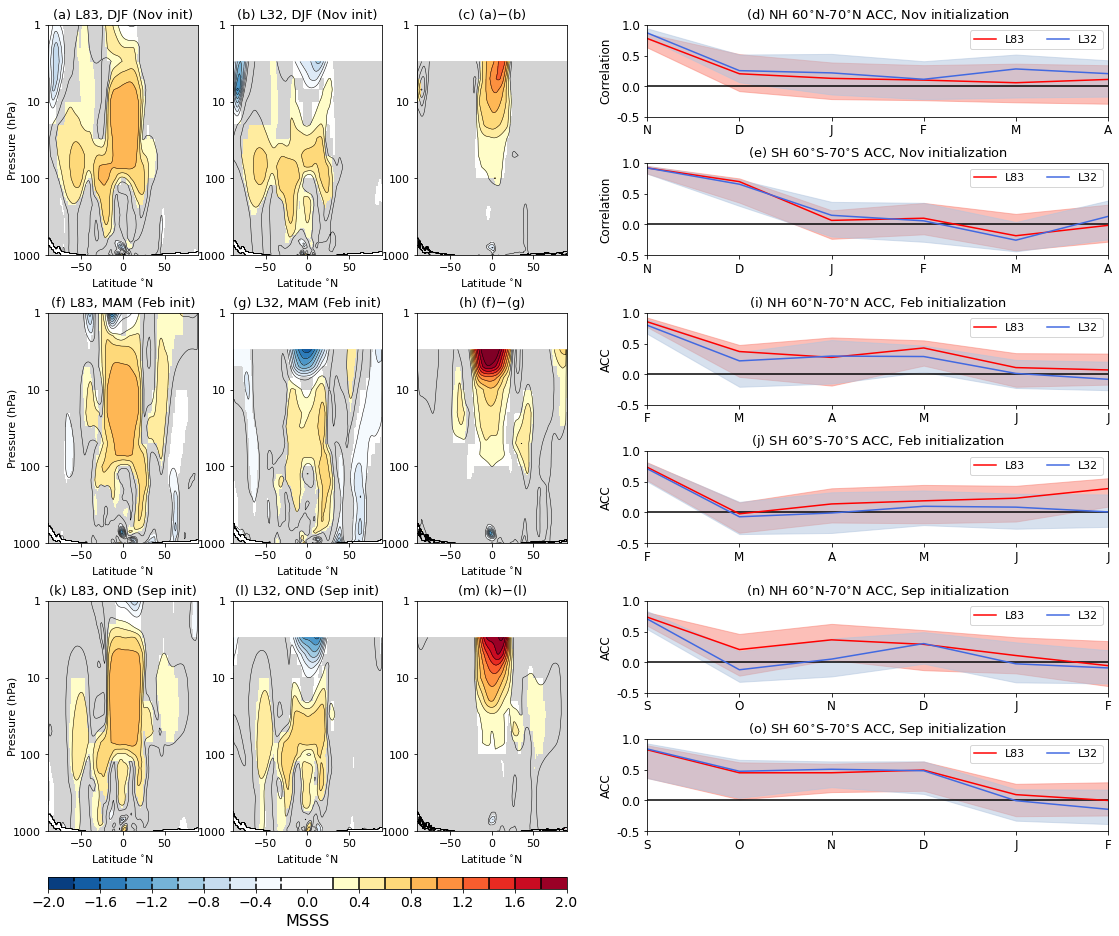

In [37]:
fig = plt.figure(figsize=(16,16))

signifdat = xr.DataArray(np.ones([signif_latpre_nov.level.size,signif_latpre_nov.lat.size]), 
                         coords=[signif_latpre_nov.level, signif_latpre_nov.lat], dims=['level','lat'])


ci=0.2 ; cmax=2

#-----Nov initialization
signifplot = signifdat.where( ~((signif_latpre_nov.min95_high_msss > 0) | (signif_latpre_nov.max95_high_msss < 0)), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov, msss_high_nov.lat, msss_high_nov.level,ci,-1*cmax,cmax,'(a) L83, DJF (Nov init)',
                              0.03,0.16,0.8,1, signifdat = signifplot)

signifplot = signifdat.where( ~((signif_latpre_nov.min95_low_msss > 0) | (signif_latpre_nov.max95_low_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_nov), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_low_nov, msss_low_nov.lat, msss_low_nov.level,ci,-1*cmax,cmax,'(b) L32, DJF (Nov init)',
                              0.19,0.32,0.8,1, ylabel=False, signifdat = signifplot)


signifplot = signifdat.where( ~((signif_latpre_nov.min95_dif_msss > 0) | (signif_latpre_nov.max95_dif_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_nov), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_nov - msss_low_nov, msss_low_nov.lat, msss_low_nov.level,ci,-1*cmax,cmax,'(c) (a)$-$(b)',
                              0.35,0.48,0.8,1,ylabel=False, signifdat=signifplot)


ax = fig.add_axes([0.55,0.92,0.4,0.08])
ax.set_title('(d) NH 60$^{\circ}$N-70$^{\circ}$N ACC, Nov initialization', fontsize=13)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_nov.month.size,1))
ax.set_xticklabels(['N','D','J','F','M','A'], fontsize=12)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)


ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_high_nh_cor, signif_nov.max95_high_nh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_high_nov_mon_em_nh, color='red', label='L83')
ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_low_nh_cor, signif_nov.max95_low_nh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_low_nov_mon_em_nh, color='royalblue', label='L32')
ax.legend(ncol=2)

ax = fig.add_axes([0.55,0.8,0.4,0.08])
ax.set_title('(e) SH 60$^{\circ}$S-70$^{\circ}$S ACC, Nov initialization', fontsize=13)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_nov.month.size,1))
ax.set_xticklabels(['N','D','J','F','M','A'], fontsize=12)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)

ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_high_sh_cor, signif_nov.max95_high_sh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_high_nov_mon_em_sh, color='red', label='L83')
ax.fill_between(np.arange(0,signif_nov.month.size,1), signif_nov.min95_low_sh_cor, signif_nov.max95_low_sh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_nov.month.size,1), cor_low_nov_mon_em_sh, color='royalblue', label='L32')
ax.legend(ncol=2)
#--------------------------

#------Feb initialization
signifplot = signifdat.where( ~((signif_latpre_feb.min95_high_msss > 0) | (signif_latpre_feb.max95_high_msss < 0)), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_feb, msss_high_feb.lat, msss_high_feb.level,ci,-1*cmax,cmax,'(f) L83, MAM (Feb init)',
                              0.03,0.16,0.55,0.75, signifdat = signifplot)


signifplot = signifdat.where( ~((signif_latpre_feb.min95_low_msss > 0) | (signif_latpre_feb.max95_low_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_feb), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_low_feb, msss_low_feb.lat, msss_low_feb.level,ci,-1*cmax,cmax,'(g) L32, MAM (Feb init)',
                              0.19,0.32,0.55,0.75, ylabel=False, signifdat = signifplot)

signifplot = signifdat.where( ~((signif_latpre_feb.min95_dif_msss > 0) | (signif_latpre_feb.max95_dif_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_feb), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_feb - msss_low_feb, msss_low_feb.lat, msss_low_feb.level,ci,-1*cmax,cmax,'(h) (f)$-$(g)',
                              0.35,0.48,0.55,0.75,ylabel=False, signifdat = signifplot)


ax = fig.add_axes([0.55,0.67,0.4,0.08])
ax.set_title('(i) NH 60$^{\circ}$N-70$^{\circ}$N ACC, Feb initialization', fontsize=13)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_feb.month.size,1))
ax.set_xticklabels(['F','M','A','M','J','J'], fontsize=12)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=12)
ax.set_ylabel('ACC', fontsize=12)


ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_high_nh_cor, signif_feb.max95_high_nh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_high_feb_mon_em_nh, color='red', label='L83')
ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_low_nh_cor, signif_feb.max95_low_nh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_low_feb_mon_em_nh, color='royalblue', label='L32')
ax.legend(ncol=2)

ax = fig.add_axes([0.55,0.55,0.4,0.08])
ax.set_title('(j) SH 60$^{\circ}$S-70$^{\circ}$S ACC, Feb initialization', fontsize=13)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_feb.month.size,1))
ax.set_xticklabels(['F','M','A','M','J','J'], fontsize=12)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=12)
ax.set_ylabel('ACC', fontsize=12)

ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_high_sh_cor, signif_feb.max95_high_sh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_high_feb_mon_em_sh, color='red', label='L83')
ax.fill_between(np.arange(0,signif_feb.month.size,1), signif_feb.min95_low_sh_cor, signif_feb.max95_low_sh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_feb.month.size,1), cor_low_feb_mon_em_sh, color='royalblue', label='L32')
ax.legend(ncol=2)
#-----------------------------------------




#------Sep initialization
signifplot = signifdat.where( ~((signif_latpre_sep.min95_high_msss > 0) | (signif_latpre_sep.max95_high_msss < 0)), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_sep, msss_high_sep.lat, msss_high_sep.level,ci,-1*cmax,cmax,'(k) L83, OND (Sep init)',
                              0.03,0.16,0.3,0.5, signifdat = signifplot)

signifplot = signifdat.where( ~((signif_latpre_sep.min95_low_msss > 0) | (signif_latpre_sep.max95_low_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_sep), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_low_sep, msss_low_sep.lat, msss_low_sep.level,ci,-1*cmax,cmax,'(l) L32, OND (Sep init)',
                              0.19,0.32,0.3,0.5, ylabel=False, signifdat = signifplot)


signifplot = signifdat.where( ~((signif_latpre_sep.min95_dif_msss > 0) | (signif_latpre_sep.max95_dif_msss < 0)), nan)
signifplot = signifplot.where( ~np.isnan(msss_low_sep), nan)
ax = zmplot.plotlatlogpre_to1(fig, msss_high_sep - msss_low_sep, msss_low_sep.lat, msss_low_sep.level,ci,-1*cmax,cmax,'(m) (k)$-$(l)',
                              0.35,0.48,0.3,0.5,ylabel=False, signifdat=signifplot)

ax = cbars.plotcolorbar(fig, ci, -1*cmax, cmax, 'MSSS', 0.03,0.48,0.25,0.26,
                        ticks=[-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2], contourlines=True)


ax = fig.add_axes([0.55,0.42,0.4,0.08])
ax.set_title('(n) NH 60$^{\circ}$N-70$^{\circ}$N ACC, Sep initialization', fontsize=13)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_sep.month.size,1))
ax.set_xticklabels(['S','O','N','D','J','F'], fontsize=12)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=12)
ax.set_ylabel('ACC', fontsize=12)


ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_high_nh_cor, signif_sep.max95_high_nh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_high_sep_mon_em_nh, color='red', label='L83')
ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_low_nh_cor, signif_sep.max95_low_nh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_low_sep_mon_em_nh, color='royalblue', label='L32')
ax.legend(ncol=2)

ax = fig.add_axes([0.55,0.3,0.4,0.08])
ax.set_title('(o) SH 60$^{\circ}$S-70$^{\circ}$S ACC, Sep initialization', fontsize=13)
ax.plot([0,6],[0,0], color='black')
ax.set_xlim(0,5)
ax.set_xticks(np.arange(0,signif_sep.month.size,1))
ax.set_xticklabels(['S','O','N','D','J','F'], fontsize=12)
ax.set_ylim(-0.5,1)
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0.0','0.5','1.0'], fontsize=12)
ax.set_ylabel('ACC', fontsize=12)

ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_high_sh_cor, signif_sep.max95_high_sh_cor, color='salmon', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_high_sep_mon_em_sh, color='red', label='L83')
ax.fill_between(np.arange(0,signif_sep.month.size,1), signif_sep.min95_low_sh_cor, signif_sep.max95_low_sh_cor, color='lightsteelblue', alpha=0.5)
ax.plot(np.arange(0,signif_sep.month.size,1), cor_low_sep_mon_em_sh, color='royalblue', label='L32')
ax.legend(ncol=2)
#-----------------------------------------



fig.savefig(plotpath+'fig3.png', bbox_inches='tight', facecolor='white')



In [35]:
import importlib
importlib.reload(cbars)

<module 'smyleutils.colorbar_utils' from '/home/islas/python/NCAR_CW3E_SMYLE/smyleutils/colorbar_utils.py'>

In [29]:
import importlib
importlib.reload(zmplot)

<module 'smyleutils.zmplot_utils' from '/home/islas/python/NCAR_CW3E_SMYLE/smyleutils/zmplot_utils.py'>

In [51]:
np.arange(0,signif_feb.month.size,1)

array([0, 1, 2, 3, 4, 5])

In [26]:
import importlib
importlib.reload(zmplot)

<module 'smyleutils.zmplot_utils' from '/home/islas/python/NCAR_CW3E_SMYLE/smyleutils/zmplot_utils.py'>

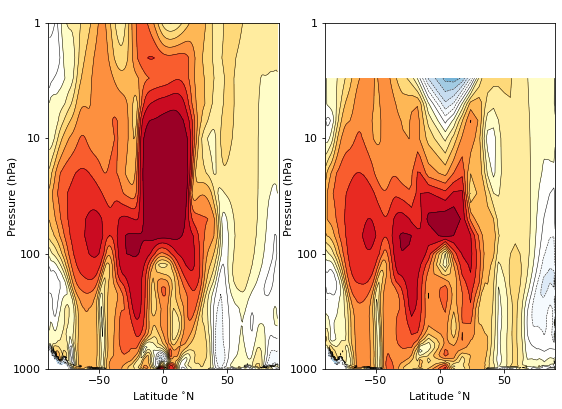

In [34]:
fig = plt.figure(figsize=(16,16))

ax = zmplot.plotlatlogpre_to1(fig, acc_high_nov, acc_high_nov.lat, acc_high_nov.level, 0.1, -1, 1, ' ',
                               0.03,0.23,0.7,1)

ax = zmplot.plotlatlogpre_to1(fig, acc_low_nov, acc_low_nov.lat, acc_low_nov.level, 0.1,-1,1,' ',
                              0.27,0.47,0.7,1)



In [32]:
import importlib
importlib.reload(zmplot)

<module 'smyleutils.zmplot_utils' from '/home/islas/python/NCAR_CW3E_SMYLE/smyleutils/zmplot_utils.py'>

In [30]:
acc_high_nov

<xarray.DataArray 'Uzm' (level: 37, lat: 192)>
array([[        nan,  0.06260149,  0.05908133, ...,  0.24332089,
         0.2515414 ,         nan],
       [        nan, -0.0875058 , -0.08968519, ...,  0.2256211 ,
         0.22852537,         nan],
       [        nan, -0.0664491 , -0.03657724, ...,  0.182628  ,
         0.18683192,         nan],
       ...,
       [        nan,         nan,         nan, ...,  0.1569244 ,
         0.16194742,  0.04826841],
       [        nan,         nan,         nan, ...,  0.0535929 ,
         0.01342573,  0.14470173],
       [        nan,         nan,         nan, ..., -0.01972036,
        -0.04692672,  0.00990495]])
Coordinates:
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    zlon     float64 0.0
    ilev     (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03